# Project 13-- [Pavan Kumar] [battula]

**TA Help:** N/A
    
**Collaboration:** N/A


## Question 1

In [2]:
library(data.table)
options(jupyter.rich_display = F)
options(repr.matrix.max.cols=30, repr.matrix.max.rows=200)

In [3]:
products <- fread("/anvil/projects/tdm/data/icecream/combined/products.csv")

In [4]:
brand_rating_counts <- aggregate(rating_count ~ brand, data = products, FUN = sum)

In [5]:
brand_rating_counts <- brand_rating_counts[order(-brand_rating_counts$rating_count),]

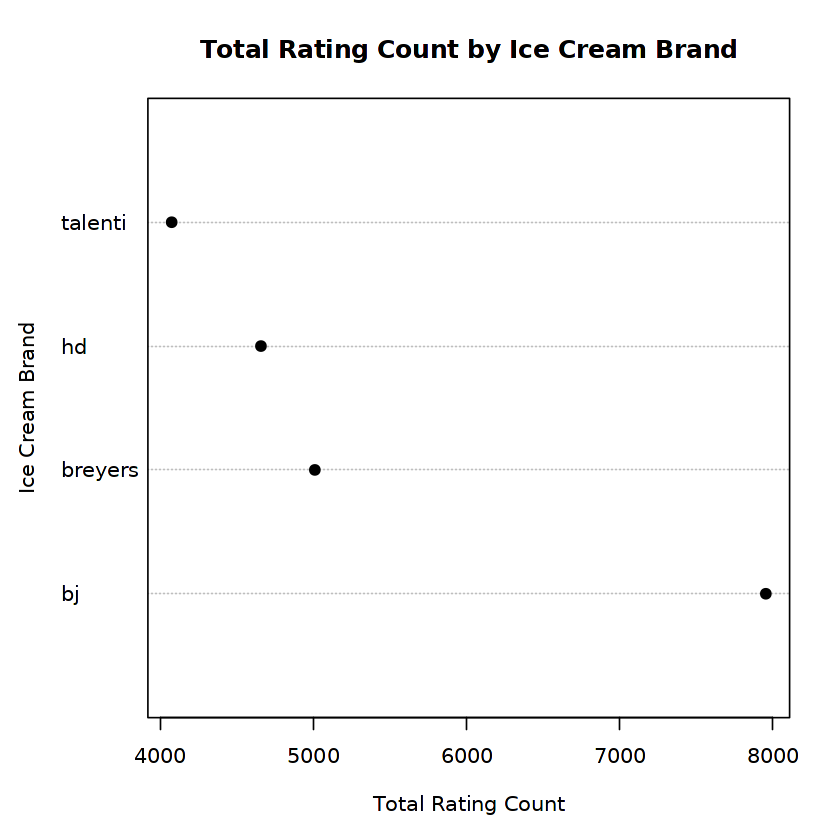

In [6]:
dotchart(brand_rating_counts$rating_count,
         labels = brand_rating_counts$brand,
         cex = 1,
         pch = 19,
         main = "Total Rating Count by Ice Cream Brand",
         xlab = "Total Rating Count",
         ylab = "Ice Cream Brand");

Markdown notes and sentences and analysis written here.

## Question 2

In [16]:
mybrands <- c("bj", "breyers", "talenti")
myfiles <- paste0("/anvil/projects/tdm/data/icecream/", mybrands, "/reviews.csv")
bigDF <- do.call(rbind, lapply(myfiles, fread))

In [42]:
bigDF$review_date <- as.Date(bigDF$date)

In [43]:
bigDF$month_year <- format(bigDF$review_date, "%Y-%m")

In [44]:
reviews_per_month_year <- table(bigDF$month_year)

In [45]:
most_reviews_month_year <- names(reviews_per_month_year)[which.max(reviews_per_month_year)]
most_reviews_month_year

[1] "2020-07"

"2020-07" 

In [46]:
bigDF$year <- format(bigDF$review_date, "%Y")

In [51]:
average_stars_per_year <- aggregate(stars ~ year, data = bigDF, FUN = mean)

In [53]:
average_stars_per_year$year 

[1] "2015" "2016" "2017" "2018" "2019" "2020"

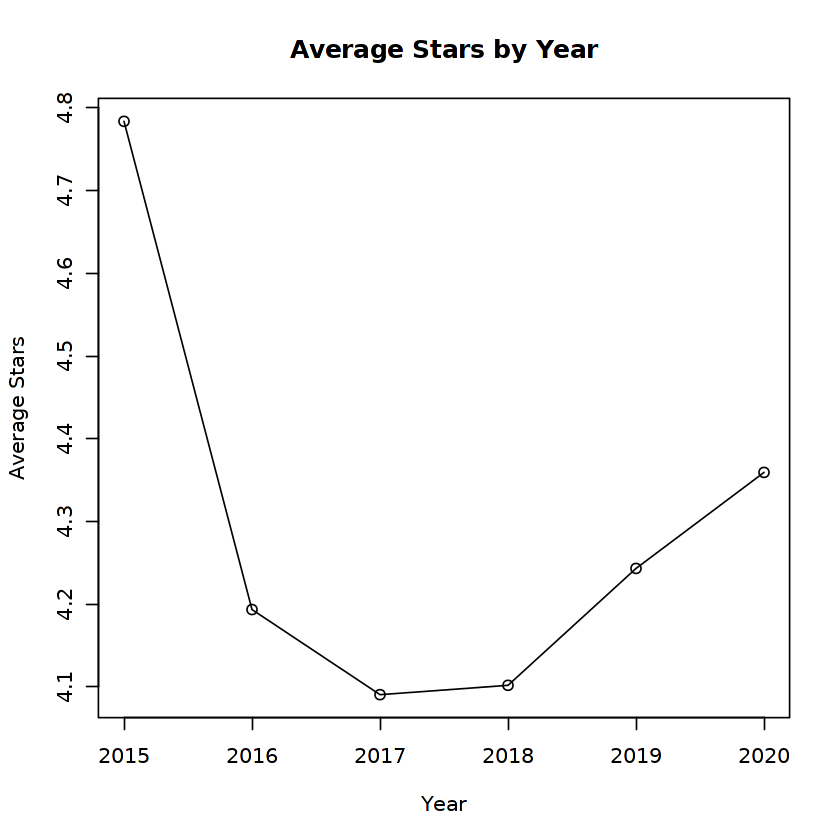

In [56]:
plot(average_stars_per_year$year, average_stars_per_year$stars,
     type = "o", # Change the plot type as needed
     xlab = "Year", ylab = "Average Stars",
     main = "Average Stars by Year")

## Question 3

In [58]:
# Calculating the average number of stars for each key
avg_stars_per_key <- aggregate(stars ~ key, data = bigDF, FUN = mean)

In [60]:
lowest_avg_key <- avg_stars_per_key[which.min(avg_stars_per_key$stars), "key"]

In [61]:
lowest_avg_key

[1] "49_breyers"

"49_breyers" is the lowest key

In [62]:
long_review_entry <- bigDF[nchar(bigDF$text) > 2500, "text"]

In [64]:
long_review_entry

  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

  text
1 First, why is it up until a few months ago I was always able to open jars of Talenti, but now I can't? I have to ask a neighbor to come over to open every. single. jar..\nI was excited to hear about the new Talenti Layers. But when I finally saw them in a store, I realized there is no way to *serve* the product.\n\nThere were a couple of customers reaching bfor jars as I mused on this, and so I asked them; ""How in the world do you scoop this into a dish to get a bit of each layer?"" They both replied ""You can't."" Then one of the women explained the only way to eat them is straight out of the jar.\nKnowing that ice cream/gelato that's refrozen after being partially melted develops ice crystals and becomes grainy, I asked about their experience with that issue. Both admitted they avoid it by eating the entire jar in one sitting.\nWell, I can't eat an entire jar of Talenti in one sitting. But I bought a jar of the Vanilla Fudge Cookie anyway. That night, I got a spoon and used it to spoon through the jar vertically to get a taste of each layer. I ate about 1/3 of the jar that night, then screwed the top back on and put it back in the freezer.\nThree days later, I decided to have a bit more - and as I had predicted, ice crystals had formed and the previously creamy gelato layers were grainy. Tasted more like ice milk.\nThe idea for a layered product was a good one, but a container that would allow portions to be scooped out would have been better. Or, perhaps selling the Layers in 3-pack/single serving jars.\nFor this reason, I won't be purchasing Talenti Layers again.\nI'm also not sure creating a product that practically requires consumers choose between eating an entire 3 serving, 930 calorie jar in one sitting OR wasting 2/3 of the jar is socially responsible. 2/3 of adults and 1/3 of children in America are overweight, obese, or morbidly obese.\nThe two women I was chatting with in the store who admitted to eating the entire jar in one sitting?\nBoth clinically obese.\nWe're so glad to hear how much you love our Gelatos, even though our new Talenti Layers Vanilla Fudge Cookie didn't quite meet your expectations, and that you had some trouble with those lids. We create our packaging with consumer convenience in mind, and we've forwarded your feedback to the appropriate staff. We'd love to gather some additional details regarding what happened, and to try to help you with those lids - please feel free to reach out to us directly via email at consumer.services@unilever.com so we can further assist you. Thanks!

## Question 4

In [67]:
filtered_reviews <- bigDF[!(bigDF$author == "" | bigDF$author == "Anonymous"), ]

In [68]:
review_counts <- table(filtered_reviews$author)

In [70]:
most_reviews_author <- names(review_counts)[which.max(review_counts)]

In [71]:
most_reviews_author

[1] "FuzzyGut"

"FuzzyGut"

In [75]:
author_reviews <- filtered_reviews[filtered_reviews$author == most_reviews_author, ]

In [77]:
one_star_review <- author_reviews[author_reviews$stars == 1, "text"]

In [78]:
one_star_review

  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1 So this is the second pint of a peanut butter focused flavor (the first being peanut buttah core) where the swirls are rock hard and jammed in the middle of the pint! I don\342\200\231t get it. I have had countless Ben and Jerry\

  text:
1 So this is the second pint of a peanut butter focused flavor (the first being peanut buttah core) where the swirls are rock hard and jammed in the middle of the pint! I don\342\200\231t get it. I have had countless Ben and Jerry\342\200\231s pints and most have been perfect but I have to admit this is really starting to bother me! It isn\342\200\231t supposed to be this way. I don\342\200\231t to stop exploring new flavors but I feel like maybe I should just stick to my tried-and-true favorites. I\342\200\231m sorry to be a downer but I\342\200\231m really not happy that 2 out of 2 peanut butter pints had inedible swirls and cores! I usually give gushing, glowing reviews on here and I\342\200\231m not a hard to please jerk. I just want ice cream I can eat.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.